Next we need to determine the baseline for each and every link separately.

for this we use following approach

   1.  identify time frame T (6 hrs in our case)

   2.  Attenuation due to rain = (TSL - RSL_MIN) - (TSL - RSL_MAX)

   3.  Attenuation due to rain = RSL_MAX - RSL_MIN



In [1]:
import pandas as pd
from matplotlib import pyplot as plot
import seaborn as sb

# allow plots to appear in the notebook
%matplotlib inline

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
data_file = pd.read_csv("/home/cmlare/Data/RF Data/Processed/2018-06-11 to 2018-07-07.csv", index_col=["ID","DateTime"], parse_dates=["DateTime"])
# data_file_1 = pd.read_csv("/media/akalanka/Engineering/Final_Year_Project/1_DATA/CML/Proccessed/Gayan/2018-05-16 to 2018-05-23.csv", index_col=["ID","DateTime"], parse_dates=["DateTime"])
# data_file_2 = pd.read_csv("/media/akalanka/Engineering/Final_Year_Project/1_DATA/CML/Proccessed/Gayan/2018-05-24 to 2018-05-31.csv", index_col=["ID","DateTime"], parse_dates=["DateTime"])

# data_file = pd.concat([data_file, data_file_1, data_file_2])

In [3]:
data_file

,,Frequency,FrequencyBand,PAttAvg,PRAvg,PRmax,PRmin,PTAvg,PTmax,PTmin,PathLength,...,RSL_MIN,SLAttn,TSL_AVG,TSL_MAX,TSL_MIN,XEnd,XStart,YEnd,YStart,distance
ID,DateTime,,,,,,,,,,,,,,,,,,,,,
7.0,2018-06-23 07:15:00,"26,106.50",26.0,5.011803e-02,6.918310e-07,8.912509e-07,6.165950e-07,5.011872e-02,5.128614e-02,5.011872e-02,1.489112,...,-32.1,-48.6,17.0,17.1,17.0,6.944490,6.945910,79.904200,79.890800,2.065082
14.0,2018-06-23 07:15:00,"25,056.50",26.0,-1.198646e-07,1.230269e-07,1.288250e-07,1.230269e-07,3.162278e-09,3.162278e-09,3.162278e-09,0.531101,...,-39.1,15.9,-55.0,-55.0,-55.0,6.945840,6.946080,79.865100,79.869900,1.280218
20.0,2018-06-23 07:15:00,"26,050.50",26.0,1.258886e-02,3.981072e-07,4.265795e-07,3.801894e-07,1.258925e-02,1.288250e-02,1.258925e-02,0.915428,...,-34.2,-45.0,11.0,11.1,11.0,6.955000,6.963240,79.883889,79.883100,1.775890
462.0,2018-06-23 07:15:00,"23,086.00",23.0,-1.143275e-07,1.174898e-07,1.380384e-07,8.912509e-08,3.162278e-09,3.162278e-09,3.162278e-09,2.097957,...,-40.5,15.7,-55.0,-55.0,-55.0,6.951250,6.933780,79.894900,79.887500,1.369299
560.0,2018-06-23 07:15:00,"24,986.50",26.0,9.999620e-03,3.801894e-07,3.890451e-07,3.630781e-07,1.000000e-02,1.023293e-02,1.000000e-02,0.537994,...,-34.4,-44.2,10.0,10.1,10.0,6.938300,6.933780,79.885700,79.887500,1.206251
587.0,2018-06-23 07:15:00,"21,966.00",23.0,-8.195153e-08,8.511380e-08,8.709636e-08,7.079458e-08,3.162278e-09,3.162278e-09,3.162278e-09,1.151372,...,-41.5,14.3,-55.0,-55.0,-55.0,6.938333,6.928056,79.877778,79.876111,1.185594
679.0,2018-06-23 07:15:00,"26,022.50",26.0,-2.538773e-07,2.570396e-07,2.754229e-07,2.511886e-07,3.162278e-09,3.162278e-09,3.162278e-09,0.244078,...,-36.0,19.1,-55.0,-55.0,-55.0,6.944220,6.945840,79.866600,79.865100,1.445862
683.0,2018-06-23 07:15:00,"17,727.50",18.0,1.548694e-02,1.230269e-06,1.288250e-06,1.174898e-06,1.548817e-02,1.584893e-02,1.548817e-02,1.943636,...,-29.3,-41.0,11.9,12.0,11.9,6.945556,6.933780,79.874444,79.887500,0.506804
796.0,2018-06-23 07:15:00,"25,126.00",26.0,-1.143275e-07,1.174898e-07,1.202264e-07,1.148154e-07,3.162278e-09,3.162278e-09,3.162278e-09,0.702243,...,-39.4,15.7,-55.0,-55.0,-55.0,6.932950,6.933780,79.893800,79.887500,1.735344


In [4]:
# set instance to store the all the different link ids
link_ids = set([])

In [5]:
for link_id, row in data_file.iterrows():
    link_ids.add(link_id[0])
link_ids_list = list(link_ids)

In [6]:
# array to store different all data frames linkwise
data_frames_link_wise = []
for i in link_ids:
    df = data_file.loc[i]
    data_frames_link_wise.append(df)

In [7]:
data_frames_link_wise[0]["PAttAvg"]*100000000

DateTime
2018-06-23 07:15:00    5.011763e+06
2018-06-27 22:15:00    5.011760e+06
2018-07-04 08:00:00    5.011760e+06
2018-06-18 06:30:00    5.011763e+06
2018-06-29 11:15:00    5.011760e+06
2018-06-29 10:30:00    5.011760e+06
2018-07-05 10:15:00    5.011760e+06
2018-06-29 21:00:00    5.011760e+06
2018-06-28 21:15:00    5.011763e+06
2018-06-19 00:30:00    5.011765e+06
2018-07-04 11:45:00    5.011763e+06
2018-06-20 10:15:00    5.011760e+06
2018-06-22 15:15:00    5.011763e+06
2018-06-12 19:45:00    5.011763e+06
2018-06-18 08:00:00    5.011765e+06
2018-06-22 10:00:00    5.011763e+06
2018-07-06 02:15:00    5.011760e+06
2018-06-21 10:00:00    5.011763e+06
2018-07-07 20:30:00    5.011763e+06
2018-06-17 15:00:00    5.011763e+06
2018-06-28 19:45:00    5.011763e+06
2018-07-08 08:30:00    5.011760e+06
2018-06-19 12:00:00    5.011763e+06
2018-06-19 01:00:00    5.011763e+06
2018-07-07 15:15:00    5.011763e+06
2018-06-26 14:15:00    5.011763e+06
2018-06-28 17:15:00    5.011768e+06
2018-06-21 12:00:00

In [8]:
# this counter helps to keep track of the link_ids index
counter = 0
for df in data_frames_link_wise:
#     array to store all the baseline values
    baseline = []
    
#     since the CML values are consistent(No missing values in the middle) we can do as following
    length_of_df = len(df)
    
#     calculate baseline for first 24 items
# Here we take the next 6 hours
    for i in range(0, 11):
        baseline_val = df[i:i+24]["RSL_MAX"].max()
        baseline.append(baseline_val)
    
#    calculate baseline for middle elements
#  Here we take the forward 3 hours and backward 3 hours(in middle)
    for i in range(11, length_of_df - 11):
        baseline_val = df[i-11:i+13]["RSL_MAX"].max()
        baseline.append(baseline_val)
        
#    calculate baseline for last 12 elements     
#  Here we consider the last 6 hours
    for i in range(length_of_df-11, length_of_df):
        baseline_val = df[i-24:i]["RSL_MAX"].max()
        baseline.append(baseline_val)
        
    df["Baseline"] = baseline
    df["ID"] = link_ids_list[counter]
    
    counter+=1
    

/home/cmlare/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/cmlare/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
all_data_frames = pd.concat(data_frames_link_wise)

In [10]:
all_data_frames = all_data_frames[[ 'ID', 'Frequency', 'FrequencyBand', 'PAttAvg', 'PRAvg', 'PRmax', 'PRmin',
       'PTAvg', 'PTmax', 'PTmin', 'PathLength', 'PrecipStation', 'RSL_AVG',
       'RSL_MAX', 'RSL_MIN', 'SLAttn', 'TSL_AVG', 'TSL_MAX', 'TSL_MIN', 'XEnd',
       'XStart', 'YEnd', 'YStart', 'distance', 'Baseline']]

In [11]:
# all_data_frames

,ID,Frequency,FrequencyBand,PAttAvg,PRAvg,PRmax,PRmin,PTAvg,PTmax,PTmin,...,SLAttn,TSL_AVG,TSL_MAX,TSL_MIN,XEnd,XStart,YEnd,YStart,distance,Baseline
DateTime,,,,,,,,,,,,,,,,,,,,,
2018-06-23 07:15:00,513.0,"25,126.50",26.0,0.050118,1.096478e-06,1.148154e-06,1.047129e-06,0.050119,0.050119,0.048978,...,-46.6,17.0,17.0,16.9,6.9172,6.90607,79.9133,79.9149,0.674430,-29.3
2018-06-27 22:15:00,513.0,"25,126.50",26.0,0.050118,1.122018e-06,1.122018e-06,1.071519e-06,0.050119,0.050119,0.048978,...,-46.5,17.0,17.0,16.9,6.9172,6.90607,79.9133,79.9149,0.674430,-29.3
2018-07-04 08:00:00,513.0,"25,126.50",26.0,0.050118,1.122018e-06,1.148154e-06,1.047129e-06,0.050119,0.050119,0.048978,...,-46.5,17.0,17.0,16.9,6.9172,6.90607,79.9133,79.9149,0.674430,-29.3
2018-06-18 06:30:00,513.0,"25,126.50",26.0,0.050118,1.096478e-06,1.122018e-06,1.071519e-06,0.050119,0.050119,0.048978,...,-46.6,17.0,17.0,16.9,6.9172,6.90607,79.9133,79.9149,0.674430,-29.3
2018-06-29 11:15:00,513.0,"25,126.50",26.0,0.050118,1.122018e-06,1.148154e-06,1.096478e-06,0.050119,0.050119,0.048978,...,-46.5,17.0,17.0,16.9,6.9172,6.90607,79.9133,79.9149,0.674430,-29.3
2018-06-29 10:30:00,513.0,"25,126.50",26.0,0.050118,1.122018e-06,1.174898e-06,1.071519e-06,0.050119,0.050119,0.048978,...,-46.5,17.0,17.0,16.9,6.9172,6.90607,79.9133,79.9149,0.674430,-29.3
2018-07-05 10:15:00,513.0,"25,126.50",26.0,0.050118,1.122018e-06,1.174898e-06,1.071519e-06,0.050119,0.050119,0.048978,...,-46.5,17.0,17.0,16.9,6.9172,6.90607,79.9133,79.9149,0.674430,-29.3
2018-06-29 21:00:00,513.0,"25,126.50",26.0,0.050118,1.122018e-06,1.148154e-06,1.071519e-06,0.050119,0.050119,0.048978,...,-46.5,17.0,17.0,16.9,6.9172,6.90607,79.9133,79.9149,0.674430,-29.3
2018-06-28 21:15:00,513.0,"25,126.50",26.0,0.050118,1.096478e-06,1.148154e-06,1.071519e-06,0.050119,0.050119,0.048978,...,-46.6,17.0,17.0,16.9,6.9172,6.90607,79.9133,79.9149,0.674430,-29.3


In [12]:
all_data_frames.to_csv("/home/cmlare/Data/RF Data/Processed/2018-06-11 to 2018-07-07_new.csv")

BaseLine determination code ends here.
Next Code is to check and see how it is behaving  
.    
.  
.  
.  
.  
we select one link and compare 

In [13]:
specific_data_frame = all_data_frames.loc[all_data_frames.ID==1454]

In [14]:
specific_data_frame

,ID,Frequency,FrequencyBand,PAttAvg,PRAvg,PRmax,PRmin,PTAvg,PTmax,PTmin,...,SLAttn,TSL_AVG,TSL_MAX,TSL_MIN,XEnd,XStart,YEnd,YStart,distance,Baseline
DateTime,,,,,,,,,,,,,,,,,,,,,
2018-05-29 06:30:00,1454,"17,850.00",18,0.063095,5.754399e-07,5.888437e-07,5.370318e-07,0.063096,0.063096,0.06166,...,-50.4,18.0,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.8
2018-05-31 21:30:00,1454,"17,850.00",18,0.063095,5.754399e-07,6.309573e-07,5.248075e-07,0.063096,0.063096,0.06166,...,-50.4,18.0,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.8
2018-05-30 17:30:00,1454,"17,850.00",18,0.063095,5.754399e-07,6.025596e-07,5.370318e-07,0.063096,0.063096,0.06166,...,-50.4,18.0,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.8
2018-05-27 01:00:00,1454,"17,850.00",18,0.063095,5.370318e-07,5.495409e-07,5.128614e-07,0.063096,0.063096,0.06166,...,-50.7,18.0,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.8
2018-05-25 15:45:00,1454,"17,850.00",18,0.063095,5.128614e-07,6.025596e-07,3.548134e-07,0.063096,0.063096,0.06166,...,-50.9,18.0,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.8
2018-05-29 01:30:00,1454,"17,850.00",18,0.063095,5.623413e-07,6.025596e-07,5.248075e-07,0.063096,0.063096,0.06166,...,-50.5,18.0,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.8
2018-05-26 04:45:00,1454,"17,850.00",18,0.063095,5.623413e-07,5.754399e-07,5.248075e-07,0.063096,0.063096,0.06166,...,-50.5,18.0,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.8
2018-05-25 09:30:00,1454,"17,850.00",18,0.063095,5.495409e-07,6.025596e-07,4.897788e-07,0.063096,0.063096,0.06166,...,-50.6,18.0,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.8
2018-05-29 06:45:00,1454,"17,850.00",18,0.063095,5.754399e-07,6.025596e-07,5.370318e-07,0.063096,0.063096,0.06166,...,-50.4,18.0,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.8


In [1]:
specific_data_frame["RSL_MAX"].plot()
# specific_data_frame["RSL_MIN"].plot()
specific_data_frame["Baseline"].plot()

NameError: name 'specific_data_frame' is not defined

In [17]:
print(max(specific_data_frame["RSL_MAX"]))
# specific_data_frame["RSL_MIN"].plot()
print(max(specific_data_frame["Baseline"]))

-31.5
-31.5


In [19]:
rainfall_mapped_df = pd.read_csv("/home/cmlare/Data/RF Data/Processed/2018-05-08 to 2018-05-15_integrated.csv")

In [20]:
specific_data_frame_1 = rainfall_mapped_df.loc[rainfall_mapped_df.distance < 5]


In [21]:
specific_data_frame = specific_data_frame_1.loc[rainfall_mapped_df.ID==1454]

In [22]:
specific_data_frame

,date_time,ID,PrecipStation,Frequency,FrequencyBand,PAttAvg,PRAvg,PRmax,PRmin,PTAvg,...,TSL_AVG,TSL_MAX,TSL_MIN,XEnd,XStart,YEnd,YStart,distance,Baseline,precipitation(mm)
264573,2018-05-11 15:30:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.063095,5.754399e-07,6.165950e-07,5.370318e-07,0.063096,...,18.0,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.5,0.0
264777,2018-05-11 15:45:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.061659,5.754399e-07,6.309573e-07,5.370318e-07,0.061660,...,17.9,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.8,0.0
264981,2018-05-11 16:00:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.061659,5.888437e-07,6.309573e-07,5.370318e-07,0.061660,...,17.9,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.9,0.0
265185,2018-05-11 16:15:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.061659,5.754399e-07,6.456542e-07,5.370318e-07,0.061660,...,17.9,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.9,0.0
265389,2018-05-11 16:30:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.061659,5.888437e-07,6.456542e-07,5.495409e-07,0.061660,...,17.9,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.9,0.0
265593,2018-05-11 16:45:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.063095,5.888437e-07,6.309573e-07,5.495409e-07,0.063096,...,18.0,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.9,0.0
265797,2018-05-11 17:00:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.061659,5.888437e-07,6.309573e-07,5.495409e-07,0.061660,...,17.9,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.9,0.0
266001,2018-05-11 17:15:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.063095,5.888437e-07,6.165950e-07,5.495409e-07,0.063096,...,18.0,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.7,0.0
266205,2018-05-11 17:30:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.061659,5.888437e-07,6.309573e-07,5.495409e-07,0.061660,...,17.9,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-32.0,0.0
266409,2018-05-11 17:45:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.063095,5.888437e-07,6.309573e-07,5.495409e-07,0.063096,...,18.0,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.8,0.0


In [23]:
specific_data_frame["Baseline_ATTN"] = specific_data_frame["Baseline"].sub(specific_data_frame["RSL_MIN"])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
specific_data_frame

,date_time,ID,PrecipStation,Frequency,FrequencyBand,PAttAvg,PRAvg,PRmax,PRmin,PTAvg,...,TSL_MAX,TSL_MIN,XEnd,XStart,YEnd,YStart,distance,Baseline,precipitation(mm),Baseline_ATTN
264573,2018-05-11 15:30:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.063095,5.754399e-07,6.165950e-07,5.370318e-07,0.063096,...,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.5,0.0,1.2
264777,2018-05-11 15:45:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.061659,5.754399e-07,6.309573e-07,5.370318e-07,0.061660,...,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.8,0.0,0.9
264981,2018-05-11 16:00:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.061659,5.888437e-07,6.309573e-07,5.370318e-07,0.061660,...,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.9,0.0,0.8
265185,2018-05-11 16:15:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.061659,5.754399e-07,6.456542e-07,5.370318e-07,0.061660,...,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.9,0.0,0.8
265389,2018-05-11 16:30:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.061659,5.888437e-07,6.456542e-07,5.495409e-07,0.061660,...,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.9,0.0,0.7
265593,2018-05-11 16:45:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.063095,5.888437e-07,6.309573e-07,5.495409e-07,0.063096,...,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.9,0.0,0.7
265797,2018-05-11 17:00:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.061659,5.888437e-07,6.309573e-07,5.495409e-07,0.061660,...,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.9,0.0,0.7
266001,2018-05-11 17:15:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.063095,5.888437e-07,6.165950e-07,5.495409e-07,0.063096,...,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.7,0.0,0.9
266205,2018-05-11 17:30:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.061659,5.888437e-07,6.309573e-07,5.495409e-07,0.061660,...,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-32.0,0.0,0.6
266409,2018-05-11 17:45:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.063095,5.888437e-07,6.309573e-07,5.495409e-07,0.063096,...,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.8,0.0,0.8


In [1]:
# specific_data_frame["Baseline_ATTN"].plot(x=specific_data_frame["date_time"], y=specific_data_frame.Baseline_ATTN)

specific_data_frame["precipitation(mm)"].plot(x=specific_data_frame["date_time"], y=specific_data_frame["precipitation(mm)"])

specific_data_frame["RSL_MIN"].plot(x=specific_data_frame["date_time"], y=specific_data_frame.RSL_MAX)

NameError: name 'specific_data_frame' is not defined

In [26]:
specific_data_frame

,date_time,ID,PrecipStation,Frequency,FrequencyBand,PAttAvg,PRAvg,PRmax,PRmin,PTAvg,...,TSL_MAX,TSL_MIN,XEnd,XStart,YEnd,YStart,distance,Baseline,precipitation(mm),Baseline_ATTN
264573,2018-05-11 15:30:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.063095,5.754399e-07,6.165950e-07,5.370318e-07,0.063096,...,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.5,0.0,1.2
264777,2018-05-11 15:45:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.061659,5.754399e-07,6.309573e-07,5.370318e-07,0.061660,...,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.8,0.0,0.9
264981,2018-05-11 16:00:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.061659,5.888437e-07,6.309573e-07,5.370318e-07,0.061660,...,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.9,0.0,0.8
265185,2018-05-11 16:15:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.061659,5.754399e-07,6.456542e-07,5.370318e-07,0.061660,...,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.9,0.0,0.8
265389,2018-05-11 16:30:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.061659,5.888437e-07,6.456542e-07,5.495409e-07,0.061660,...,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.9,0.0,0.7
265593,2018-05-11 16:45:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.063095,5.888437e-07,6.309573e-07,5.495409e-07,0.063096,...,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.9,0.0,0.7
265797,2018-05-11 17:00:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.061659,5.888437e-07,6.309573e-07,5.495409e-07,0.061660,...,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.9,0.0,0.7
266001,2018-05-11 17:15:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.063095,5.888437e-07,6.165950e-07,5.495409e-07,0.063096,...,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.7,0.0,0.9
266205,2018-05-11 17:30:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.061659,5.888437e-07,6.309573e-07,5.495409e-07,0.061660,...,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-32.0,0.0,0.6
266409,2018-05-11 17:45:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.063095,5.888437e-07,6.309573e-07,5.495409e-07,0.063096,...,18.0,17.9,6.894167,6.877778,79.96,79.989722,2.913181,-31.8,0.0,0.8


In [27]:
# calculating the actual time period with in the 15 minutes
# we assume within 15minutes the time period is a heaviside function
# Then using RSL_MIN, RSL_MAX, RSL_AVG we can calculate the actual time period the RSL_MIN happened

In [28]:
# t*RSL_MIN + (15 - t)*RSL_MAX = 15*RSL_AVG

In [29]:
# t = 15*(RSL_MAX - RSL_AVG) / (RSL_MAX - RSL_MIN)

In [151]:
def calculate_time(row):
    if (row["RSL_MAX"] - row["RSL_MIN"]) == 0:
        return 15
    else:
        time  = 15*(row["RSL_MAX"] - row["RSL_AVG"]) / (row["RSL_MAX"] - row["RSL_MIN"])
        return time

In [109]:
specific_data_frame["refined"] = specific_data_frame.apply(lambda x: calculate_time(x)*x["Baseline_ATTN"], axis=1)
specific_data_frame["time"] = specific_data_frame.apply(lambda x: calculate_time(x), axis=1)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [110]:
specific_data_frame

,date_time,ID,PrecipStation,Frequency,FrequencyBand,PAttAvg,PRAvg,PRmax,PRmin,PTAvg,...,XStart,YEnd,YStart,distance,Baseline,precipitation(mm),Baseline_ATTN,refined,time,timeMean
264573,2018-05-11 15:30:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.063095,5.754399e-07,6.165950e-07,5.370318e-07,0.063096,...,6.877778,79.96,79.989722,2.913181,-31.5,0.0,1.2,1.549800,1.291500,7.500000
264777,2018-05-11 15:45:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.061659,5.754399e-07,6.309573e-07,5.370318e-07,0.061660,...,6.877778,79.96,79.989722,2.913181,-31.8,0.0,0.9,1.056857,1.174286,8.571429
264981,2018-05-11 16:00:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.061659,5.888437e-07,6.309573e-07,5.370318e-07,0.061660,...,6.877778,79.96,79.989722,2.913181,-31.9,0.0,0.8,0.937714,1.172143,7.184663
265185,2018-05-11 16:15:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.061659,5.754399e-07,6.456542e-07,5.370318e-07,0.061660,...,6.877778,79.96,79.989722,2.913181,-31.9,0.0,0.8,0.868800,1.086000,9.375000
265389,2018-05-11 16:30:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.061659,5.888437e-07,6.456542e-07,5.495409e-07,0.061660,...,6.877778,79.96,79.989722,2.913181,-31.9,0.0,0.7,0.819450,1.170643,8.571429
265593,2018-05-11 16:45:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.063095,5.888437e-07,6.309573e-07,5.495409e-07,0.063096,...,6.877778,79.96,79.989722,2.913181,-31.9,0.0,0.7,0.901250,1.287500,7.500000
265797,2018-05-11 17:00:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.061659,5.888437e-07,6.309573e-07,5.495409e-07,0.061660,...,6.877778,79.96,79.989722,2.913181,-31.9,0.0,0.7,0.901250,1.287500,7.500000
266001,2018-05-11 17:15:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.063095,5.888437e-07,6.165950e-07,5.495409e-07,0.063096,...,6.877778,79.96,79.989722,2.913181,-31.7,0.0,0.9,1.305450,1.450500,7.184663
266205,2018-05-11 17:30:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.061659,5.888437e-07,6.309573e-07,5.495409e-07,0.061660,...,6.877778,79.96,79.989722,2.913181,-32.0,0.0,0.6,0.772500,1.287500,7.500000
266409,2018-05-11 17:45:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.063095,5.888437e-07,6.309573e-07,5.495409e-07,0.063096,...,6.877778,79.96,79.989722,2.913181,-31.8,0.0,0.8,1.030000,1.287500,7.500000


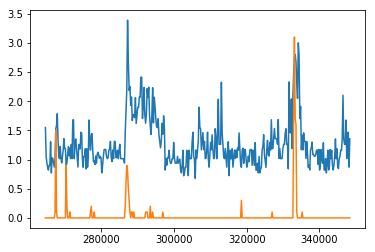

In [111]:
specific_data_frame["refined"].plot()
specific_data_frame["precipitation(mm)"].plot()

In [72]:
mean = 7.184662749701337

def abc(row):
    if row["time"] < mean:
        return mean
    else:
        return row["time"]
    
specific_data_frame["timeMean"] = specific_data_frame.apply(lambda x: abc(x), axis=1)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [73]:
specific_data_frame["refined"] = specific_data_frame.apply(lambda x: x["timeMean"]*x["Baseline_ATTN"], axis=1)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
specific_data_frame["refined"].plot()
specific_data_frame["precipitation(mm)"].plot()
(specific_data_frame["RSL_MIN"]*-1).plot(figsize=(80,80))

NameError: name 'specific_data_frame' is not defined

In [76]:
specific_data_frame

,date_time,ID,PrecipStation,Frequency,FrequencyBand,PAttAvg,PRAvg,PRmax,PRmin,PTAvg,...,XStart,YEnd,YStart,distance,Baseline,precipitation(mm),Baseline_ATTN,refined,time,timeMean
264573,2018-05-11 15:30:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.063095,5.754399e-07,6.165950e-07,5.370318e-07,0.063096,...,6.877778,79.96,79.989722,2.913181,-31.5,0.0,1.2,9.000000,7.500000,7.500000
264777,2018-05-11 15:45:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.061659,5.754399e-07,6.309573e-07,5.370318e-07,0.061660,...,6.877778,79.96,79.989722,2.913181,-31.8,0.0,0.9,7.714286,8.571429,8.571429
264981,2018-05-11 16:00:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.061659,5.888437e-07,6.309573e-07,5.370318e-07,0.061660,...,6.877778,79.96,79.989722,2.913181,-31.9,0.0,0.8,5.747730,6.428571,7.184663
265185,2018-05-11 16:15:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.061659,5.754399e-07,6.456542e-07,5.370318e-07,0.061660,...,6.877778,79.96,79.989722,2.913181,-31.9,0.0,0.8,7.500000,9.375000,9.375000
265389,2018-05-11 16:30:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.061659,5.888437e-07,6.456542e-07,5.495409e-07,0.061660,...,6.877778,79.96,79.989722,2.913181,-31.9,0.0,0.7,6.000000,8.571429,8.571429
265593,2018-05-11 16:45:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.063095,5.888437e-07,6.309573e-07,5.495409e-07,0.063096,...,6.877778,79.96,79.989722,2.913181,-31.9,0.0,0.7,5.250000,7.500000,7.500000
265797,2018-05-11 17:00:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.061659,5.888437e-07,6.309573e-07,5.495409e-07,0.061660,...,6.877778,79.96,79.989722,2.913181,-31.9,0.0,0.7,5.250000,7.500000,7.500000
266001,2018-05-11 17:15:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.063095,5.888437e-07,6.165950e-07,5.495409e-07,0.063096,...,6.877778,79.96,79.989722,2.913181,-31.7,0.0,0.9,6.466196,6.000000,7.184663
266205,2018-05-11 17:30:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.061659,5.888437e-07,6.309573e-07,5.495409e-07,0.061660,...,6.877778,79.96,79.989722,2.913181,-32.0,0.0,0.6,4.500000,7.500000,7.500000
266409,2018-05-11 17:45:00,1454,curw_kottawa_dharmapala_north,"17,850.00",18,0.063095,5.888437e-07,6.309573e-07,5.495409e-07,0.063096,...,6.877778,79.96,79.989722,2.913181,-31.8,0.0,0.8,6.000000,7.500000,7.500000


In [88]:
zero_percip_frame = specific_data_frame.loc[specific_data_frame["precipitation(mm)"]!=0]

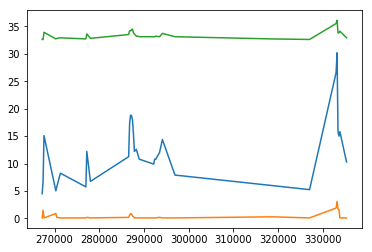

In [92]:
zero_percip_frame["refined"].plot()
zero_percip_frame["precipitation(mm)"].plot()
(zero_percip_frame["RSL_MIN"]*-1).plot()

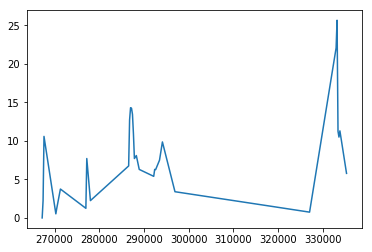

In [101]:
zero_percip_frame["refined"].sub(min(zero_percip_frame["refined"])).plot()

In [102]:
min(zero_percip_frame["refined"])

4.499999999999931

In [87]:
zero_percip_frame.loc[313047]

date_time                      2018-05-14 03:30:00
ID                                            1454
PrecipStation        curw_kottawa_dharmapala_north
Frequency                               17,850.00 
FrequencyBand                                   18
PAttAvg                                  0.0630951
PRAvg                                  5.88844e-07
PRmax                                  5.88844e-07
PRmin                                  5.62341e-07
PTAvg                                    0.0630957
PTmax                                    0.0630957
PTmin                                    0.0616595
PathLength                                 3.75177
RSL_AVG                                      -32.3
RSL_MAX                                      -32.3
RSL_MIN                                      -32.5
SLAttn                                       -50.3
TSL_AVG                                         18
TSL_MAX                                         18
TSL_MIN                        